In [10]:
from pkg_req import *
from construction import *
from solver import *
from backend import *
from pulses import *
from fidelity import *
from initialization import *
from qiskit.visualization import plot_histogram


# **Exploring the "Cross Resonance" (CR) Pulse**

- The CR pulse will involve applying a resonant pulse on the control channel for a given qubit. This will induce a rotation on the target

- First, let's just run a control pulse through the simulator with different initial qubit states to see what is happening:

# *First let's look at pulse shapes and how they impact the results. For this section, we'll confine the initial states of both qubits to $\ket{0}$ and just look at the overall count output for each state*

# Gaussian square:

In [66]:
g1

GaussianSquare(duration=256, sigma=400, width=5, amp=1, angle=0)

In [67]:
g2

GaussianSquare(duration=1000, sigma=1000, width=5, amp=1, angle=0)

- Let's try the same params:

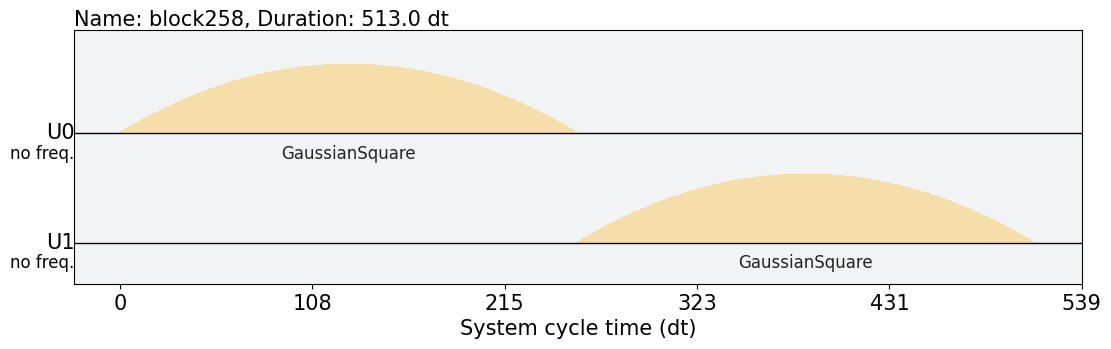

In [112]:
schedules = []
with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
# avoid overlap which can cause issues with coherence and unintended compilation coupling
        pulse.play(g1, pulse.ControlChannel(0)) #transmit signal to qubits
        pulse.play(g1, pulse.ControlChannel(1))
        #pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
        pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

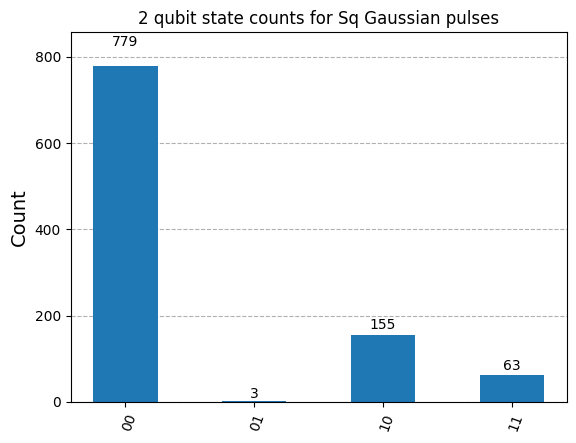

In [116]:
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
plot_histogram(counts,title="2 qubit state counts for Sq Gaussian pulses")

- Lets look at what each qubit state is:

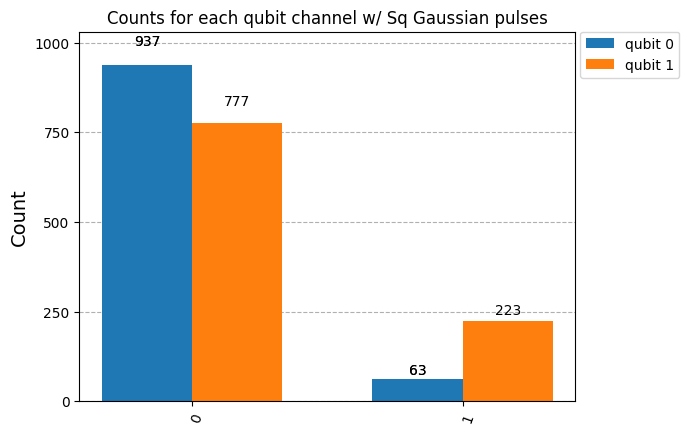

In [86]:
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(g1, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(g1, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Counts for each qubit channel w/ Sq Gaussian pulses")

From above for these arbitrarily chosen parameters there is obvious entanglement ocurring for $\ket{q_1}$ but not $\ket{q_0}$ 

- How does this compare to the same pulses applied to the Drive channel?

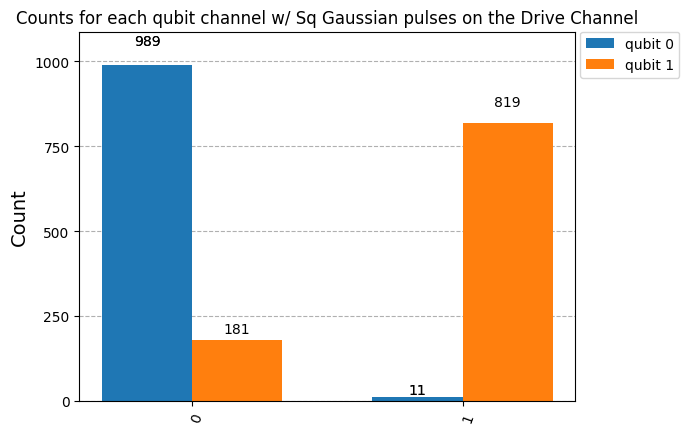

In [85]:
for i in [0,1]:
    gauss = pulse.library.Gaussian(duration=1000, amp=0.6, sigma=2000, angle=0)
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.DriveChannel(0)) #transmit signal to qubits
                pulse.play(g1, pulse.DriveChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.DriveChannel(0)) #transmit signal to qubits
                pulse.play(g1, pulse.DriveChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Counts for each qubit channel w/ Sq Gaussian pulses on the Drive Channel")

- **Some entanglement present, because of there are more than one operations occurring (I think)**

If we swap the order of operations in the schedule (i.e., apply the control pulse on qubit 1 then qubit 0), can we then entangle $\ket{0}$?

In [79]:
g1

GaussianSquare(duration=256, sigma=400, width=5, amp=1, angle=0)

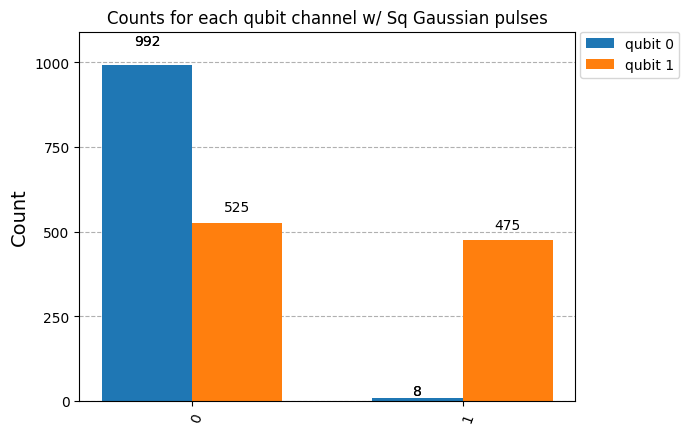

In [84]:
for i in [0,1]:
    gauss = pulse.library.Gaussian(duration=5000, amp=0.1, sigma=3000, angle=0)
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.ControlChannel(1)) #transmit signal to qubits
                pulse.play(g1, pulse.ControlChannel(0))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.ControlChannel(1)) #transmit signal to qubits
                pulse.play(g1, pulse.ControlChannel(0))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Counts for each qubit channel w/ Sq Gaussian pulses")

- No, we can't increase the entanglement in $\ket{q_0}$ by simply reversing the order of operations. However this looks like we have created a Hadamard gate for $\ket{q_1}$

- **What happens when we have two pulses which are not equal?**

In [80]:
g1

GaussianSquare(duration=256, sigma=400, width=5, amp=1, angle=0)

In [81]:
g2 = qiskit.pulse.library.GaussianSquare(duration=1000, amp=1, sigma=1000, angle=0, width=5)

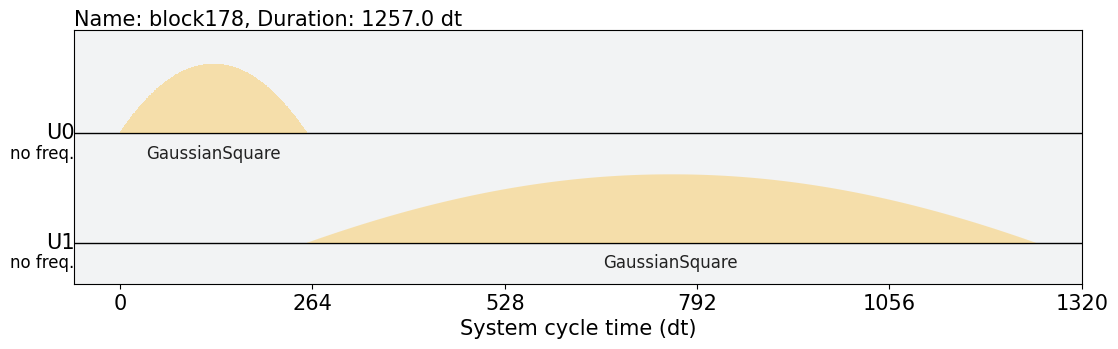

In [82]:
schedules = []
with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
# avoid overlap which can cause issues with coherence and unintended compilation coupling
        pulse.play(g1, pulse.ControlChannel(0)) #transmit signal to qubits
        pulse.play(g2, pulse.ControlChannel(1))
        #pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
        pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

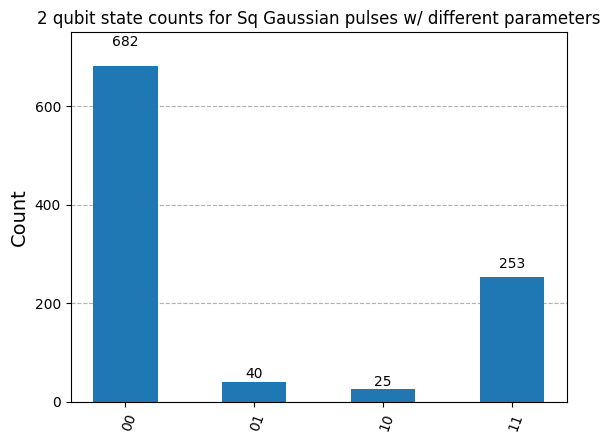

In [83]:
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
plot_histogram(counts,title="2 qubit state counts for Sq Gaussian pulses w/ different parameters")

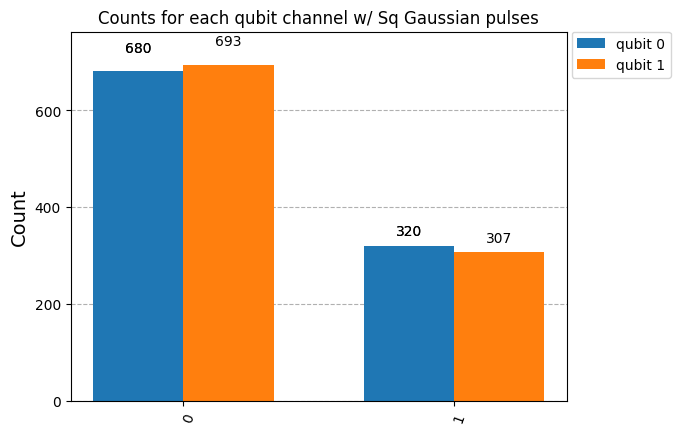

In [90]:
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(g2, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(g2, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Counts for each qubit channel w/ Sq Gaussian pulses")

- Obvious entanglement of both qubits. What if we now flip the order of operation?

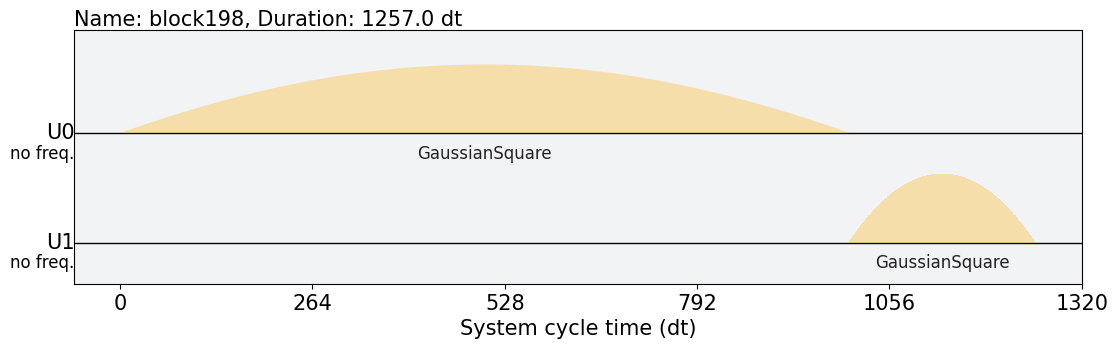

In [91]:
schedules = []
with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
# avoid overlap which can cause issues with coherence and unintended compilation coupling
        pulse.play(g2, pulse.ControlChannel(0)) #transmit signal to qubits
        pulse.play(g1, pulse.ControlChannel(1))
        #pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
        pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

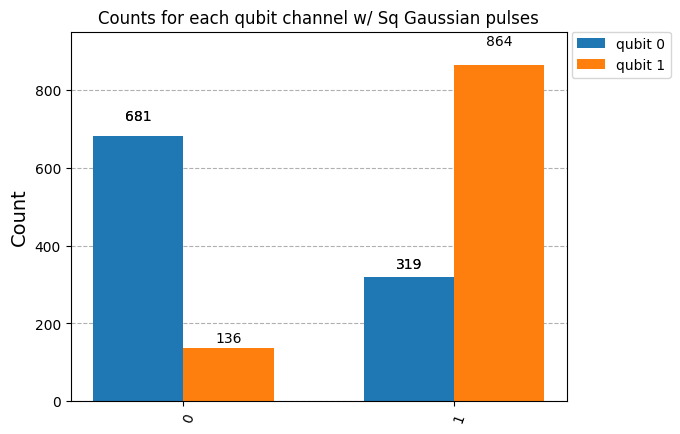

In [93]:
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g2, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(g1, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g2, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(g1, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Counts for each qubit channel w/ Sq Gaussian pulses")

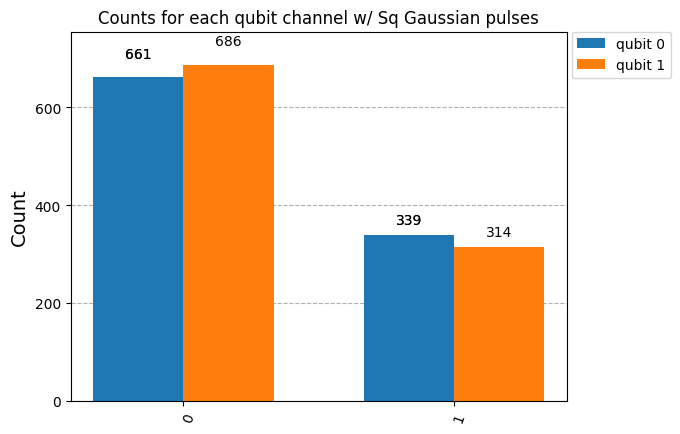

In [102]:
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(g2, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(g1, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(g2, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Counts for each qubit channel w/ Sq Gaussian pulses")

**It is clear that with some ***manual*** optimization, the Hadmard can be generated for both qubits.**

- Lets now try with different pulse structures for Sq Gaussian pulses:

# **Gaussian Pulses**

In [107]:
gauss1

Gaussian(duration=1000, sigma=500, amp=1, angle=0)

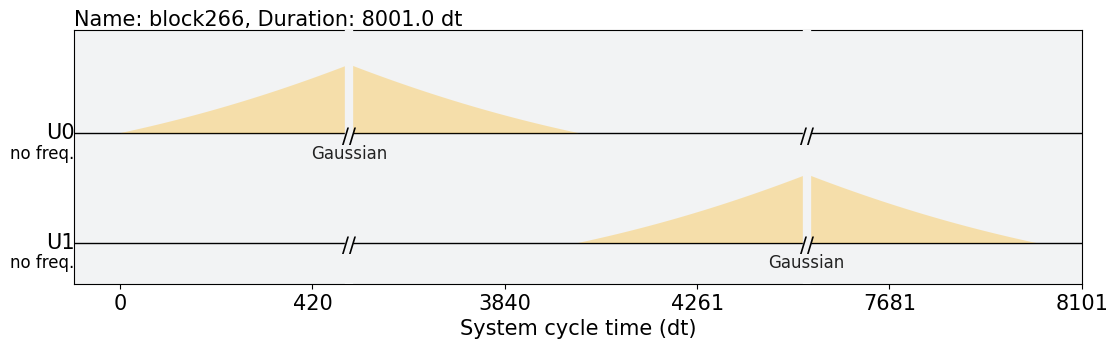

In [122]:
gauss1=pulse.library.Gaussian(duration=4000, amp=1, sigma=1000, angle=0)
schedules = []
with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        pulse.play(gauss1, pulse.ControlChannel(0))
        pulse.play(gauss1, pulse.ControlChannel(1))
        pulse.measure_all()
schedules.append(schedule)
schedules[0].draw()

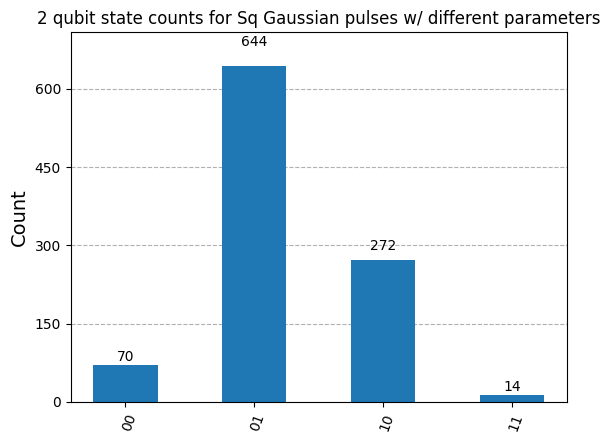

In [123]:
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
plot_histogram(counts,title="2 qubit state counts for Sq Gaussian pulses w/ different parameters")

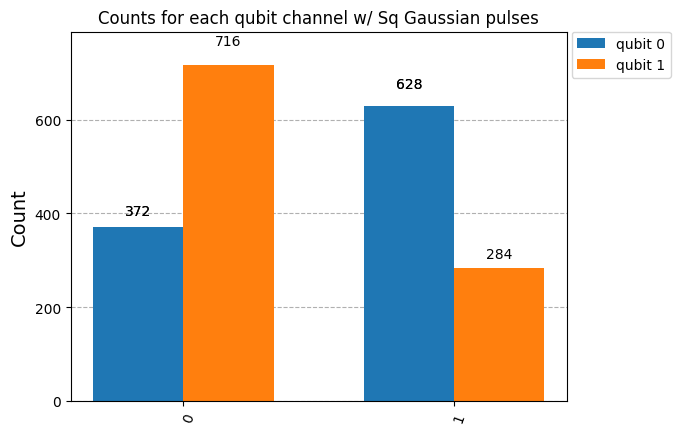

In [124]:
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(gauss1, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(gauss1, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(gauss1, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(gauss1, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Counts for each qubit channel w/ Sq Gaussian pulses")

In [159]:
for sig in np.arange(1,6000,500):
    gauss1_1=pulse.library.Gaussian(duration=6000, amp=1, sigma=sig, angle=0)
    
    for i in [0,1]:
        schedules = []
        if i==0:
            with pulse.build(backend=backend) as schedule:
                with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
            # avoid overlap which can cause issues with coherence and unintended compilation coupling
                    pulse.play(gauss1_1, pulse.ControlChannel(0)) #transmit signal to qubits
                    pulse.play(gauss1_1, pulse.ControlChannel(1))
                    pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                    #pulse.measure_all()
            schedules.append(schedule)
            job = backend.run(schedules, shots=1000)
            result = job.result()
            counts0=result.get_counts()
        if i==1:
            with pulse.build(backend=backend) as schedule:
                with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
            # avoid overlap which can cause issues with coherence and unintended compilation coupling
                    pulse.play(gauss1_1, pulse.ControlChannel(0)) #transmit signal to qubits
                    pulse.play(gauss1_1, pulse.ControlChannel(1))
                    pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                    #pulse.measure_all()
            schedules.append(schedule)
            job = backend.run(schedules, shots=1000)
            result = job.result()
            counts1=result.get_counts()
        print(sig,counts0,counts1)
    #plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Counts for each qubit channel w/ Sq Gaussian pulses")

1 {np.str_('0'): np.int64(1000)} {np.str_('0'): np.int64(792), np.str_('1'): np.int64(208)}
1 {np.str_('0'): np.int64(1000)} {np.str_('0'): np.int64(454), np.str_('1'): np.int64(546)}
501 {np.str_('0'): np.int64(437), np.str_('1'): np.int64(563)} {np.str_('0'): np.int64(454), np.str_('1'): np.int64(546)}
501 {np.str_('0'): np.int64(437), np.str_('1'): np.int64(563)} {np.str_('0'): np.int64(710), np.str_('1'): np.int64(290)}
1001 {np.str_('0'): np.int64(69), np.str_('1'): np.int64(931)} {np.str_('0'): np.int64(710), np.str_('1'): np.int64(290)}


KeyboardInterrupt: 

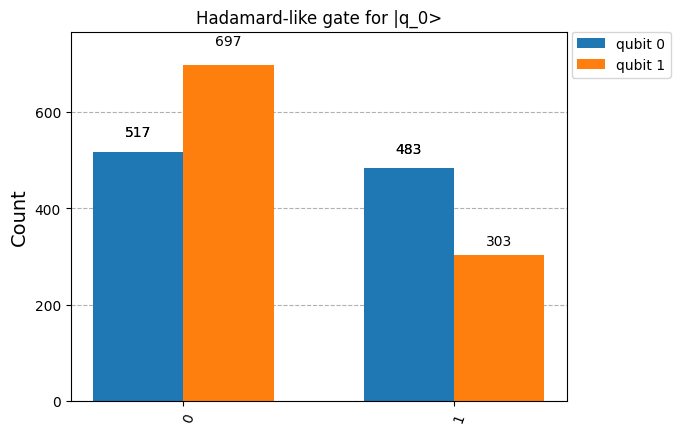

In [183]:
gauss1_sig1000=pulse.library.Gaussian(duration=6021, amp=1, sigma=504, angle=0)
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(gauss1_sig1000, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(gauss1_sig1000, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(gauss1_sig1000, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(gauss1_sig1000, pulse.ControlChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Hadamard-like gate for |q_0>")